<a href="https://colab.research.google.com/github/howard-haowen/NLP-demos/blob/main/nlp_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn

## 20 newsgroups

In [1]:
from sklearn.datasets import fetch_20newsgroups

- `subset`: {`train`, `test`, `all`}
- `remove`: any subset of (`headers`, `footers`, `quotes`) to remove metadata
- `categories`: a list of category names

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [3]:
cat_names = newsgroups.target_names
cat_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
cat_idxes = newsgroups.target
len(cat_idxes)

18846

In [9]:
news = newsgroups.data
len(news)

18846

In [10]:
news[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [11]:
import pandas as pd

def newsgroups2df(subset='all',
                  remove=('headers', 'footers', 'quotes')):
    newsgroups = fetch_20newsgroups(subset=subset, remove=remove)
    cat_names = newsgroups.target_names
    cat_idxes = newsgroups.target
    news = newsgroups.data
    df = pd.DataFrame(
        {
            "news": news,
            "cat": [cat_names[c] for c in cat_idxes],
        }
    )
    return df

In [13]:
df_train = newsgroups2df(subset='train')
df_train

,news,cat
0,I was wondering if anyone out there could enli...,rec.autos
1,A fair number of brave souls who upgraded thei...,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",sci.space
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,sci.med
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",comp.sys.mac.hardware
11311,I just installed a DX2-66 CPU in a clone mothe...,comp.sys.ibm.pc.hardware
11312,\nWouldn't this require a hyper-sphere. In 3-...,comp.graphics


In [14]:
df_test = newsgroups2df(subset='test')
df_test

,news,cat
0,I am a little confused on all of the models of...,rec.autos
1,I'm not familiar at all with the format of the...,comp.windows.x
2,"\nIn a word, yes.\n",alt.atheism
3,\nThey were attacking the Iraqis to drive them...,talk.politics.mideast
4,\nI've just spent two solid months arguing tha...,talk.religion.misc
...,...,...
7527,"\n Henry, if I read you correctly, you may b...",sci.space
7528,"about\nthem on\n\nActually, I thought Macs wer...",comp.sys.mac.hardware
7529,"I sent a version of this post out a while ago,...",rec.sport.baseball
7530,I have this kit which includes the following :...,misc.forsale


# Gensim

In [13]:
import gensim.downloader as api

See [here](https://github.com/RaRe-Technologies/gensim-data) for more details.

In [16]:
corpora = list(api.info()['corpora'].keys())
corpora

['semeval-2016-2017-task3-subtaskBC',
 'semeval-2016-2017-task3-subtaskA-unannotated',
 'patent-2017',
 'quora-duplicate-questions',
 'wiki-english-20171001',
 'text8',
 'fake-news',
 '20-newsgroups',
 '__testing_matrix-synopsis',
 '__testing_multipart-matrix-synopsis']

In [17]:
models = list(api.info()['models'].keys())
models

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

# NLTK Corpus

In [ ]:
import nltk

## Types of corpus structures
- isolated: `gutenberg`
- categorized: `brown`
- overlapping: `reuters`
- temporal: `inaugural`

## Brown

In [ ]:
nltk.corpus.brown

<CategorizedTaggedCorpusReader in '.../corpora/brown' (not loaded yet)>

In [ ]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
tagged_sents = brown.tagged_sents(categories='humor')
len(tagged_sents)

1053

In [ ]:
for sent in tagged_sents[:3]:
    print(sent)

[('It', 'PPS'), ('was', 'BEDZ'), ('among', 'IN'), ('these', 'DTS'), ('that', 'CS'), ('Hinkle', 'NP'), ('identified', 'VBD'), ('a', 'AT'), ('photograph', 'NN'), ('of', 'IN'), ('Barco', 'NP'), ('!', '.'), ('!', '.')]
[('For', 'CS'), ('it', 'PPS'), ('seems', 'VBZ'), ('that', 'CS'), ('Barco', 'NP'), (',', ','), ('fancying', 'VBG'), ('himself', 'PPL'), ('a', 'AT'), ("ladies'", 'NNS$'), ('man', 'NN'), ('(', '('), ('and', 'CC'), ('why', 'WRB'), ('not', '*'), (',', ','), ('after', 'IN'), ('seven', 'CD'), ('marriages', 'NNS'), ('?', '.'), ('?', '.')]
[(')', ')'), (',', ','), ('had', 'HVD'), ('listed', 'VBN'), ('himself', 'PPL'), ('for', 'IN'), ('Mormon', 'NP-TL'), ('Beard', 'NN-TL'), ('roles', 'NNS'), ('at', 'IN'), ('the', 'AT'), ('instigation', 'NN'), ('of', 'IN'), ('his', 'PP$'), ('fourth', 'OD'), ('murder', 'NN'), ('victim', 'NN'), ('who', 'WPS'), ('had', 'HVD'), ('said', 'VBN'), (':', ':'), ('``', '``'), ('With', 'IN'), ('your', 'PP$'), ('beard', 'NN'), (',', ','), ('dear', 'JJ'), (',', ','

## Inaugural speeches

In [ ]:
nltk.corpus.inaugural

<PlaintextCorpusReader in '.../corpora/inaugural' (not loaded yet)>

In [ ]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [ ]:
file_ids = inaugural.fileids()
file_ids

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [ ]:
inaugural.raw(file_ids[-1])

'Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America\'s day. This is democracy\'s day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.\n\nToday we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The peopleâ\x80\x94the will of the people has been heard, and the will of the people has been heeded. We\'ve learned again that democracy is precious, democracy is fragile. And at this hour, my friends, democracy has prevailed.\n\nSo now, on this hallowed ground where just a few days ago violence sought to shake the Capitol\'s very foundation, we come together as one Nation under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries. As we look ahead in our uniquely American way

In [ ]:
import pandas as pd

def inaugura2df(file_ids):
    years = [id[:4] for id in file_ids]
    presidents = [id[5:].replace(".txt", "") for id in file_ids]
    texts = [inaugural.raw(id) for id in file_ids]
    tokens = [inaugural.words(id) for id in file_ids]
    df = pd.DataFrame(
        {
            "year": years,
            "president": presidents,
            "text": texts,
            "tokens": tokens,
        }
    )
    df.set_index("year", inplace=True)
    df.index = df.index.astype(int)
    return df

In [ ]:
speeches = inaugura2df(file_ids)
speeches

,president,text,tokens
year,,,
1789,Washington,Fellow-Citizens of the Senate and of the House...,"(Fellow, -, Citizens, of, the, Senate, and, of..."
1793,Washington,"Fellow citizens, I am again called upon by the...","(Fellow, citizens, ,, I, am, again, called, up..."
1797,Adams,"When it was first perceived, in early times, t...","(When, it, was, first, perceived, ,, in, early..."
1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,"(Friends, and, Fellow, Citizens, :, Called, up..."
1805,Jefferson,"Proceeding, fellow citizens, to that qualifica...","(Proceeding, ,, fellow, citizens, ,, to, that,..."
1809,Madison,Unwilling to depart from examples of the most ...,"(Unwilling, to, depart, from, examples, of, th..."
1813,Madison,About to add the solemnity of an oath to the o...,"(About, to, add, the, solemnity, of, an, oath,..."
1817,Monroe,I should be destitute of feeling if I was not ...,"(I, should, be, destitute, of, feeling, if, I,..."
1821,Monroe,"Fellow citizens, I shall not attempt to descri...","(Fellow, citizens, ,, I, shall, not, attempt, ..."


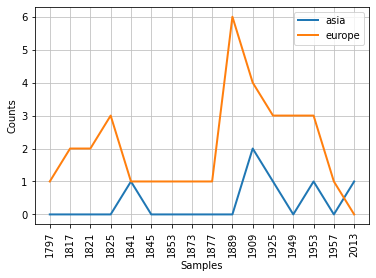

In [ ]:
cfd = nltk.ConditionalFreqDist(
                (target, fileid[:4])
                for fileid in inaugural.fileids()
                for w in inaugural.words(fileid)
                for target in ['asia', 'europe']
                if w.lower().startswith(target))
cfd.plot()

## Movie reviews

In [ ]:
nltk.corpus.movie_reviews

<CategorizedPlaintextCorpusReader in '.../corpora/movie_reviews' (not loaded yet)>

In [ ]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
file_ids = movie_reviews.fileids()

In [ ]:
#file_ids is a list of file names
"""
['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 ...]
"""

In [ ]:
len(file_ids)

2000

In [ ]:
neg_ids = [id for id in file_ids if id[:3] == 'neg']
pos_ids = [id for id in file_ids if id[:3] == 'pos']
print(len(neg_ids), len(pos_ids))

1000 1000


In [ ]:
movie_reviews.raw(file_ids[0])

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [ ]:
def moviews2df(file_ids):
    sentiments = [1 if id[:3] == 'pos' else 0 for id in file_ids]
    texts = [movie_reviews.raw(id) for id in file_ids]
    tokens = [movie_reviews.words(id) for id in file_ids]
    df = pd.DataFrame(
        {
            "sentiment": sentiments,
            "text": texts,
            "tokens": tokens,
        }
    )
    return df

In [ ]:
movies = moviews2df(file_ids)
movies

,sentiment,text,tokens
0,0,"plot : two teen couples go to a church party ,...","(plot, :, two, teen, couples, go, to, a, churc..."
1,0,the happy bastard's quick movie review \ndamn ...,"(the, happy, bastard, ', s, quick, movie, revi..."
2,0,it is movies like these that make a jaded movi...,"(it, is, movies, like, these, that, make, a, j..."
3,0,""" quest for camelot "" is warner bros . ' firs...","("", quest, for, camelot, "", is, warner, bros, ..."
4,0,synopsis : a mentally unstable man undergoing ...,"(synopsis, :, a, mentally, unstable, man, unde..."
...,...,...,...
1995,1,wow ! what a movie . \nit's everything a movie...,"(wow, !, what, a, movie, ., it, ', s, everythi..."
1996,1,"richard gere can be a commanding actor , but h...","(richard, gere, can, be, a, commanding, actor,..."
1997,1,"glory--starring matthew broderick , denzel was...","(glory, --, starring, matthew, broderick, ,, d..."
1998,1,steven spielberg's second epic film on world w...,"(steven, spielberg, ', s, second, epic, film, ..."


# Hugging Face Datasets

In [ ]:
!pip install datasets

In [ ]:
from datasets import list_datasets

In [ ]:
hf_datasets = list_datasets()
print("Number of datasets in the Datasets library: ", len(hf_datasets), "\n\n")

Number of datasets in the Datasets library:  4307 




In [ ]:
hf_datasets

['assin',
 'ar_res_reviews',
 'ambig_qa',
 'bianet',
 'ag_news',
 'ajgt_twitter_ar',
 'aeslc',
 'bc2gm_corpus',
 'air_dialogue',
 'acronym_identification',
 'afrikaans_ner_corpus',
 'allegro_reviews',
 'ade_corpus_v2',
 'adversarial_qa',
 'alt',
 'billsum',
 'amazon_polarity',
 'amttl',
 'ascent_kb',
 'big_patent',
 'bn_hate_speech',
 'bswac',
 'capes',
 'arsentd_lev',
 'bible_para',
 'amazon_reviews_multi',
 'ai2_arc',
 'beans',
 'anli',
 'arabic_pos_dialect',
 'best2009',
 'boolq',
 'ar_sarcasm',
 'asnq',
 'bnl_newspapers',
 'amazon_us_reviews',
 'arxiv_dataset',
 'banking77',
 'bookcorpus',
 'bprec',
 'c3',
 'allocine',
 'aslg_pc12',
 'biosses',
 'bbc_hindi_nli',
 'americas_nli',
 'biomrc',
 'blimp',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'arabic_speech_corpus',
 'arcd',
 'blended_skill_talk',
 'cail2018',
 'blbooksgenre',
 'bookcorpusopen',
 'bsd_ja_en',
 'atomic',
 'autshumato',
 'blog_authorship_corpus',
 'caner',
 'app_reviews',
 'arabic_billion_words',
 'art',
 'asset',
 'blbo

In [ ]:
from datasets import load_dataset

In [ ]:
# The second argument indicates languages, and the options include:
# "all_languages", "de", "en", "es", "fr", "ja", "zh"
dataset = load_dataset("amazon_reviews_multi", "en")

## Amazon multilingual reviews

### DatasetDict

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [ ]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Title: {example['review_title']}'")
        print(f"'>> Review: {example['review_body']}'")
        print(f"'>> Product Category: {example['product_category']}'")
        print(f"'>> Review stars: {example['stars']}'")

In [ ]:
show_samples(dataset)


'>> Title: Worked in front position, not rear'
'>> Review: 3 stars because these are not rear brakes as stated in the item description. At least the mount adapter only worked on the front fork of the bike that I got it for.'
'>> Product Category: other'
'>> Review stars: 3'

'>> Title: meh'
'>> Review: Does it’s job and it’s gorgeous but mine is falling apart, I had to basically put it together again with hot glue'
'>> Product Category: beauty'
'>> Review stars: 2'

'>> Title: Can't beat these for the money'
'>> Review: Bought this for handling miscellaneous aircraft parts and hanger "stuff" that I needed to organize; it really fit the bill. The unit arrived quickly, was well packaged and arrived intact (always a good sign). There are five wall mounts-- three on the top and two on the bottom. I wanted to mount it on the wall, so all I had to do was to remove the top two layers of plastic drawers, as well as the bottom corner drawers, place it when I wanted and mark it; I then used som

### Pandas DataFrame

In [ ]:
dataset.set_format("pandas")
df = dataset["test"][:]
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0199937,product_en_0902516,reviewer_en_0097389,1,"These are AWFUL. They are see through, the fab...",Don’t waste your time!,en,apparel
1,en_0863335,product_en_0348072,reviewer_en_0601537,1,I bought 4 and NONE of them worked. Yes I used...,One Star,en,other
2,en_0565010,product_en_0356154,reviewer_en_0970351,1,On first use it didn't heat up and now it does...,Totally useless,en,other
3,en_0963290,product_en_0583322,reviewer_en_0216125,1,You want an HONEST answer? I just returned fro...,Gold filled earrings,en,jewelry
4,en_0238156,product_en_0487636,reviewer_en_0514203,1,The glue works fine but the container is impos...,Poor container,en,industrial_supplies
...,...,...,...,...,...,...,...,...
4995,en_0681530,product_en_0198517,reviewer_en_0539725,5,"It's still early, but so far the scales seems ...",Very sleek.,en,drugstore
4996,en_0157408,product_en_0206198,reviewer_en_0605408,5,I’ve used this face mask a few times now and i...,... face mask a few times now and it works gre...,en,beauty
4997,en_0542558,product_en_0525205,reviewer_en_0727937,5,Great price. Good quality.,Five Stars,en,home
4998,en_0754850,product_en_0613095,reviewer_en_0643466,5,Fits my 2016 F150 XLT great. Now I dont have t...,2016 F150 XLT,en,automotive


# Miscellaneous 

## TMDB movie plots

In [1]:
import pandas as pd

In [2]:
raw_df = pd.read_csv('https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2010%20-%20Project%208%20-%20Movie%20Recommendations%20with%20Document%20Similarity/tmdb_5000_movies.csv.gz', compression='gzip')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
raw_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
def load_tmdb():
    raw_df = pd.read_csv('https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2010%20-%20Project%208%20-%20Movie%20Recommendations%20with%20Document%20Similarity/tmdb_5000_movies.csv.gz', compression='gzip')
    cols = ['title', 'tagline', 'overview', 'popularity', 'release_date']
    df = raw_df[cols].copy()
    df['tagline'].fillna('', inplace=True)
    df['description'] = df['tagline'] + ' ' + df['overview']
    df.set_index('release_date', inplace=True)
    df.sort_index(inplace=True)
    return df

In [12]:
tmdb = load_tmdb()
tmdb

,title,tagline,overview,popularity,description
release_date,,,,,
1916-09-04,Intolerance,The Cruel Hand of Intolerance,"The story of a poor young woman, separated by ...",3.232447,The Cruel Hand of Intolerance The story of a p...
1925-11-05,The Big Parade,,The story of an idle rich boy who joins the US...,0.785744,The story of an idle rich boy who joins the U...
1927-01-10,Metropolis,There can be no understanding between the hand...,In a futuristic city sharply divided between t...,32.351527,There can be no understanding between the hand...
1929-01-30,Pandora's Box,,The rise and inevitable fall of an amoral but ...,1.824184,The rise and inevitable fall of an amoral but...
1929-02-08,The Broadway Melody,The pulsating drama of Broadway's bared heart ...,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,The pulsating drama of Broadway's bared heart ...
...,...,...,...,...,...
2016-09-09,The Birth of a Nation,The Untold Story of Nat Turner,"Nat Turner, a former slave in America, leads a...",9.452808,"The Untold Story of Nat Turner Nat Turner, a f..."
2016-09-16,Mr. Church,He was the one person she could always count on.,A unique friendship develops when a little gir...,7.828459,He was the one person she could always count o...
2016-10-02,Two Lovers and a Bear,,Set in a small town near the North Pole where ...,3.139294,Set in a small town near the North Pole where...
